### <font color=blue|red|pink>Question 1 - Pre-processing, dimensionalization, visualization and image sorting</font>

In [1]:
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pylab as plt
import os
from os import listdir, path
from PIL import Image as PImage # converting images into arrays

---
---
> <font color=blue|red|pink> 1. Write a loadImages (path) function that takes the path as input to where is the folder of images e.g. loadImages (“C: / images”), reads the images, converts them to 100 x 100 pixels and returns a table 30 column data, where each image is represented as a vector column. The function also returns the categories (labels) to which the different ones belong images encoded in integers (eg 0 for photos captured in winter, 1 for the photos taken in the fall and 2 for those that recorded in the spring).</font>

In [2]:
def load_images(path, width=100, height=100, inter=cv2.INTER_LANCZOS4) :
    """Read all images from a directory, converts them to all to the same dimensions,
    and return a DataFrame where each row corresponds to an image.
    
    Parameters
    ----------
    path (str): path (abolute or relative in the current working directory) of the directory of the images 
    width (int): (default=100)
    height (int): (default=100)
    inter : flag that takes one of the following cv2 interpolation methods/algorithm for image resize:
            cv2.INTER_LANCZOS4
            cv2.INTER_NEAREST (default)
            cv2.INTER_LINEAR
            cv2.INTER_AREA
            cv2.INTER_CUBIC

    Returns
    ------
    df (pandas DataFrame): 
        rows : images
        columns: 1st) integers representing the season each photo was taken
                      corresponding to the inital letter of each image file
                      (0:winter:W, 1:fall:F, 2:spring:S)
                rest) RGB color data for each pixel
    """
    path_abs = os.getcwd()+path
    images = os.listdir(path_abs)
    
    paths=[str(path_abs)+'/'+img for img in images]
    seasons=[]
    for filename in images:
        seasons.append(filename[0])
        dic = {'W':0, 'F':1, 'S':2}
        seasons=[dic.get(n, n) for n in seasons]
        
    dim = (width, height)
    x = [] # images as arrays
    for i,patth in enumerate(paths):
        # Read and resize image
        img_size_full = cv2.imread(patth)
        img_size_new = cv2.resize(img_size_full, dim, interpolation=inter)
        img_flat = img_size_new.reshape(-1,width*height*3).tolist()[0]
        obs_full = np.append(seasons[i], img_flat)
        x.append(obs_full)
        
    df = pd.DataFrame(x)
    
    names=['label']
    for i in range(1,(width+1)):
        for j in range(1,(height+1)):
            for c in ('B', 'G', 'R'):
                names.append(str(i)+','+str(j)+':'+c)
    df.columns = names
    df.index = [str(path)+'/'+img for img in os.listdir(path_abs)]
    return(df)

In [3]:
df=load_images('/images')
df

,label,"1,1:B","1,1:G","1,1:R","1,2:B","1,2:G","1,2:R","1,3:B","1,3:G","1,3:R",...,"100,97:R","100,98:B","100,98:G","100,98:R","100,99:B","100,99:G","100,99:R","100,100:B","100,100:G","100,100:R"
/images/W2.jpg,0,155,152,146,147,145,141,206,201,201,...,198,223,204,199,224,205,200,225,206,201
/images/S3.jpg,2,1,1,1,0,0,0,0,0,0,...,5,1,9,2,0,6,1,2,4,4
/images/W10.jpg,0,45,48,54,90,90,93,137,132,134,...,196,201,196,193,201,196,193,199,194,191
/images/S9.jpg,2,25,71,61,31,58,54,17,54,46,...,22,18,41,28,20,24,25,44,43,46
/images/F9.jpg,1,4,17,44,15,149,201,15,102,170,...,60,35,43,42,50,60,69,91,101,111
/images/W5.jpg,0,214,207,192,218,211,196,227,222,207,...,56,183,174,160,192,183,169,197,188,174
/images/W8.jpg,0,101,70,48,82,53,28,71,57,44,...,47,153,113,78,132,92,61,42,21,14
/images/S4.jpg,2,254,229,171,248,232,172,172,146,123,...,179,57,170,171,12,139,125,19,128,117
/images/S2.jpg,2,19,31,43,32,59,69,13,25,37,...,136,37,145,132,39,139,127,33,138,131
/images/F1.jpg,1,5,57,89,3,79,102,7,86,113,...,126,55,99,133,41,72,108,35,69,114


&nbsp;

&nbsp;

&nbsp;

---
---
> <font color=blue|red|pink> 2. Write a function pca_image_space_visualization(x) which takes the input data table, calculates the first two main components (principal components) of the data and displays the data in the first two main components. The function returns a plot in which images are visualized in the two-dimensional space resulting from the projection of the data in the first two main components. The plot is expected to be in the form of:
    ![](output_example.png)
>> 1. What does it mean when images are located near this two - dimensional space that is shown in the above plot? What does it mean when images are far apart? Can we generalize these conclusions for the original image space which is very large in size?
>> 2. Images corresponding to one of the seasons tend to be grouped closer together than the rest? Why is this happening?</font>

In [4]:
def pca_image_space_visualization(x, width=16., height=8.):
    """Read a labeled dataframe, calculate the two first principal components of the data
    and return a plot representing the 2-dimensional data.
    
    Parameters
    ----------
    x (pandas DataFrame) : dataframe i) labeled with label in column 0 
                                    ii) in the form of output of function load_images
                                        representing flattened image data
    width (float) : width of the plot (default=16.)
    height (float) : height of the plot (default=8.)
                                        
    Returns
    ------
    plot : in which images are visualized in the two-dimensional space resulting 
           from the projection of the data in the first two principal components
    """    
    from sklearn.preprocessing import StandardScaler
    # Standardizing the features
    features = x.iloc[:,1:].values
    features_st = StandardScaler().fit_transform(features)
    
    from sklearn.decomposition import PCA
    # initalize and apply PCA transformation
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(features_st)
    # create new DataFrame with PCA values
    principalDf = pd.DataFrame(data = principalComponents
                               , columns = ['principal component 1', 'principal component 2'])
    paths = principalDf.index = list(x.index)
    finalDf = pd.concat([principalDf, x.iloc[:,0]], axis = 1)
    
    pca_image_space_visualization.explained_variance_ratio = pca.explained_variance_ratio_
                         
    import matplotlib.pyplot as plt
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    pca1=list(finalDf.iloc[:,0].values)
    pca2=list(finalDf.iloc[:,1].values)
    img_paths=[os.getcwd()+patth for patth in paths]
    fig, ax = plt.subplots(figsize = (width, height))
    ax.scatter(pca1, pca2)
    ax.axis('off')
    for pca1, pca2, img_path in zip(pca1, pca2, img_paths):
        ab = AnnotationBbox(OffsetImage(plt.imread(img_path), zoom=0.25), (pca1, pca2))
        ax.add_artist(ab)

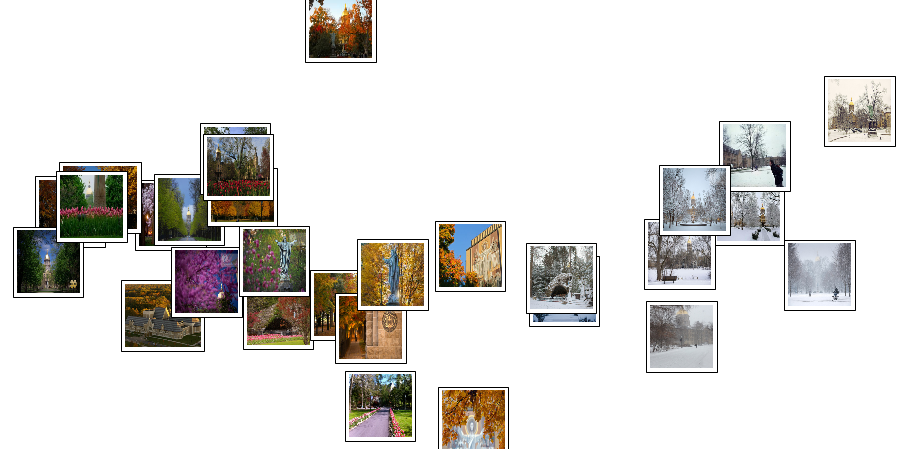

In [5]:
pca_image_space_visualization(df)

In the above plot, the images located closer together are positively related to each other in some way, while images located far apart across the PCs are negatively related (always in respect of the linearly uncorrelated variables PC1 and PC2).

But what about generalization of these or other conclusions from this plot for the original image space?

In [6]:
print('The above plot represents image data that explain only the',
      "{:.2%}".format(pca_image_space_visualization.explained_variance_ratio.sum()),
      'of the variance/information of the initial data.')

The above plot represents image data that explain only the 50.94% of the variance/information of the initial data.


In that sense, we can say that the 2-D graph, using just PC1 and PC2, would be a 50.94% approximation or 50.94% accurate representation of the original image space.

Let's insist a bit more:

In [7]:
print('We can see that the x axis —corresponding to the first  principal component— represents the',
      "{:.2%}".format(pca_image_space_visualization.explained_variance_ratio[0]),
      ', \nwhile the y axis —corresponding to the second principal component— represents the',
      "{:.2%}".format(pca_image_space_visualization.explained_variance_ratio[1]),
      '\nof the variance(information) of the initial data.')

We can see that the x axis —corresponding to the first  principal component— represents the 42.08% , 
while the y axis —corresponding to the second principal component— represents the 8.86% 
of the variance(information) of the initial data.


At this point, we should keep in mind two facts and a graph:
- The PCs are ranked (as first, second and so on) based on the percentage of variance/information of the original data explained by them. Thus the first principal component retains always more data information than the second one.
- The PCs are linearly uncorrelated; the second principal component does not explain variance that has retained earlier by the first one.

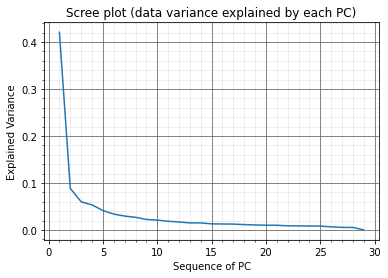

In [114]:
#variance0=[]

#for i in range(1,30):
#    pca = PCA(n_components=i)
#    pca.fit_transform(X)
#    variance0.append(pca.explained_variance_ratio_[i-1])
    
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Scree plot (data variance explained by each PC)')
plt.xlabel('Sequence of PC')
plt.ylabel('Explained Variance')
plt.plot(range(1,30), variance0)

Given, all the more, that in our case the first principal component explains/retains 3.75 times more information than the second one, then it is expected that is along this axis we perceive a much more semantically meaningful variance of its values, or else, it's logical it's along this axis that we have a separable clustering of winter images (obviously PC1 tends to be interpreted as the amount of white colour) even if fall and spring remain inseparable in a unified cluster.

In that sense, it may be more correct and useful to have a graphical representation where the length of the axes is not set randomly but based justly on this ratio of retained variance between of the first two principal components

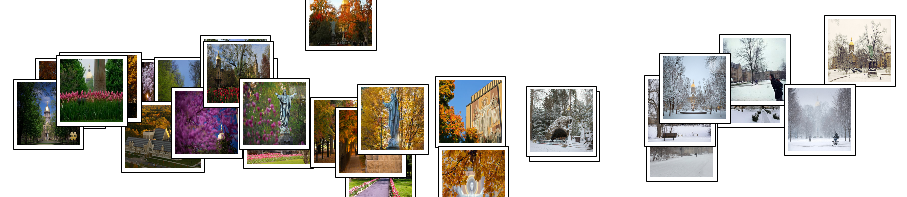

In [8]:
pc1_exlained_variance = pca_image_space_visualization.explained_variance_ratio[0]
pc2_exlained_variance = pca_image_space_visualization.explained_variance_ratio[1]
r=pc2_exlained_variance/pc1_exlained_variance
pca_image_space_visualization(df, 16, 16*r)

&nbsp;

&nbsp;

&nbsp;

---
---

> <font color=blue|red|pink> 3. Compare the accuracy of the nearest neighbor classifier (1-NN) and of linear support vector machine (SVM) to the problem of recognizing the season in which an image was recorded. In other words compare the performance (in terms of classification accuracy) of the above classifiers in the classification of image data into categories winter, spring and autumn.
> You are asked to address the classification problem using: 
>- the initials large dimension images in vector format.
> - low characteristics dimension that you will export through PCA.
>> 1. Mathematically define the measure of classification accuracy.
>> 2. Use 5-fold cross validation and indicate the average classification accuracy for both classifiers for both large data and low dimensional characteristics.
>> 3. How to determine the dimension of the features to be exported through PCA?
>> 4. Which classifier has the best performance and why?</font>

### 1-nn classification with the large data

We will first develop a 1-nn classifier, so, in the first place we have to standarize our data

In [9]:
from sklearn.preprocessing import StandardScaler
# standardize the features
X = df.iloc[:,1:].values
X = StandardScaler().fit_transform(X)
y= df.iloc[:,0].values

In [10]:
# import the knn classifier library and the cross-validation library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# perform 5-fold cross-validation 1-nn classification and calculate the average accuracy
knn = KNeighborsClassifier(n_neighbors=1)
accuracy_1nn = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
print('for an 5-fold cross-validaiton 1-nn classification the average accuracy is:\n', accuracy_1nn)

for an 5-fold cross-validaiton 1-nn classification the average accuracy is:
 0.7666666666666667


At this point, we have to be careful because accuracy with a binary classifier is measured as:

\begin{equation*}
Acc =
\frac{\text{Number of correct predictions}}{\text{Total number of predictions}} =
\frac{TP + TN}{P + N} =
\frac{TP + TN}{TP + FP + TN +FP}
\end{equation*}

Where P = Positives, N = Negatives, TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

<div class="alert alert-block alert-warning">
<b>But</b> that is not our case, since we have to deal with a problem of a multiclass/3-class classification problem.
</div>

The **multiclass classification accuracy**  is calculated as the average accuracy per class:

\begin{equation*}
Acc =
\frac{\sum_{i=1}^k \frac{tp_i+tn_i}{tp_i+tn_i+fp_i+fn_i}}{k},
\quad\quad \text{for $k:$ total number of classes}.
\end{equation*}

---
### 1-nn classification with the low-dimensional data (using PCA decomposition) 

\begin{equation*}
|| X - W[t] C [t] || _F ^ 2 / || X || _F ^ 2 
\end{equation*}

\begin{equation*}
ε (|| Χ - W [t] C [t] || _F ^ 2 - || Χ - W [t-1] C [t-1] || _F ^ 2) / || X || _F ^ 2 <ε \text{ with ε = 0.01 or 0.001 or 0.0001)}
\end{equation*}

At this point we should note that we will choose the number of components so as to retain at least 95% of the data variance:


In [11]:
# import PCA decomposition algorithm from the appropriate scikit-learn module
from sklearn.decomposition import PCA

# the data (X,y) are already standarized so we proceed directly to the decomposition
pca = PCA(n_components=.95)
principal_components = pca.fit_transform(X)
print('The minimun number of principal components that explain at least 95% of data variance is:\n',
      pca.n_components_,
      ',\nand indeed, the retained data variance (information) is:\n',
      "{:.2%}".format(pca.explained_variance_ratio_.sum()),
     '.\nSo, we have here a percentage significantly higher compared to the ',
      "{:.2%}".format(pca.explained_variance_ratio_[0:2].sum()),
      ' of the two prncipal components we saw above, as well as a significant reduction',
      ' in the number of features/estimators, from 30,000 to',
      pca.n_components_)

The minimun number of principal components that explain at least 95% of data variance is:
 22 ,
and indeed, the retained data variance (information) is:
 95.59% .
So, we have here a percentage significantly higher compared to the  50.94%  of the two prncipal components we saw above, as well as a significant reduction  in the number of features/estimators, from 30,000 to 22


With these 22-dimensional data we proceed again with the development of a 1-nn classifier.

In [12]:
# perform 5-fold cross-validation 1-nn classification and calculate the average accuracy
knn_pca = KNeighborsClassifier(n_neighbors=1)
accuracy_1nn_pca = cross_val_score(knn_pca, principal_components, y, cv=5, scoring='accuracy').mean()
print('for a 5-fold cross-validaiton 1-nn classification (PCA-95%variance) the average accuracy is:\n',
      accuracy_1nn_pca)

for a 5-fold cross-validaiton 1-nn classification (PCA-95%variance) the average accuracy is:
 0.7333333333333333


We thus observe a reduction in the average classification accuracy, that is not only expected, but also very similar to the reduction in the variance of the data with which we trained the *1-nn_pca* classifier.

---
### SVM classification with the large data

This time we will try the four different kernel functions so as to choose the best one base on their classification accuracy

In [13]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf', random_state=0, gamma='auto')
svm_linear = svm.SVC(kernel='linear', random_state=0, gamma='auto')
svm_poly = svm.SVC(kernel='poly', random_state=0, gamma='auto')
svm_sigmoid = svm.SVC(kernel='sigmoid', random_state=0, gamma='auto')

In [14]:
accuracy_svm_rbf = cross_val_score(svm_rbf, X, y, cv=5, scoring='accuracy').mean()
accuracy_svm_linear = cross_val_score(svm_linear, X, y, cv=5, scoring='accuracy').mean()
accuracy_svm_poly = cross_val_score(svm_poly, X, y, cv=5, scoring='accuracy').mean()
accuracy_svm_sigmoid = cross_val_score(svm_sigmoid, X, y, cv=5, scoring='accuracy').mean()
print('accuracy_svm_rbf    : ',
      "{:.2f}".format(accuracy_svm_rbf),
      '\naccuracy_svm_linear : ',
      "{:.2f}".format(accuracy_svm_linear),
      '\naccuracy_svm_poly   : ',
      "{:.2f}".format(accuracy_svm_poly),
      '\naccuracy_svm_sigmoid: ',
      "{:.2f}".format(accuracy_svm_sigmoid))

accuracy_svm_rbf    :  0.80 
accuracy_svm_linear :  0.80 
accuracy_svm_poly   :  0.67 
accuracy_svm_sigmoid:  0.80


---
### SVM classification with the low-dimensional data (using PCA decomposition) 

And we will do the same but this time with the 22-dimensional data from the PCA decomposition:

In [15]:
accuracy_svm_pca_rbf = cross_val_score(svm_rbf, principal_components, y, cv=5, scoring='accuracy').mean()
accuracy_svm_pca_linear = cross_val_score(svm_linear, principal_components, y, cv=5, scoring='accuracy').mean()
accuracy_svm_pca_poly = cross_val_score(svm_poly, principal_components, y, cv=5, scoring='accuracy').mean()
accuracy_svm_pca_sigmoid = cross_val_score(svm_sigmoid, principal_components, y, cv=5, scoring='accuracy').mean()
print('accuracy_svm_pca_rbf    : ',
      "{:.2f}".format(accuracy_svm_pca_rbf),
      '\naccuracy_svm_pca_linear : ',
      "{:.2f}".format(accuracy_svm_pca_linear),
      '\naccuracy_svm_pca_poly   : ',
      "{:.2f}".format(accuracy_svm_pca_poly),
      '\naccuracy_svm_pca_sigmoid: ',
      "{:.2f}".format(accuracy_svm_pca_sigmoid))

accuracy_svm_pca_rbf    :  0.43 
accuracy_svm_pca_linear :  0.80 
accuracy_svm_pca_poly   :  0.60 
accuracy_svm_pca_sigmoid:  0.80


# Further Investigation and Discussion

From the accuracy scores of the eight SVM classifiers we end up with two remarks:
- considering altogether, both approaches andd all the kernel functions, the linear and sigmoid kernel functions seem to have better accuracy scores than the radial basis and the polynomial one,
- regarding the accuracy score, the classification using linear and sigmoid kernel functions doesn't seem to be affected by whether we rely on all image data information or only on 95.6% of it.

The second remark makes us wonder if there is a limit of retained data variance and number of principal components below which the performance of the classifiers (in terms of at least of accuracy) is lower than that of the classifiers trained with all the information and if there is, in general, some pattern (linear or not) that characterises this relation  "number of PC/explained data variance ~ accuracy of the classifier".

After all, although we chose the number of principal components with a solid and widely accepted reasoning (selecting those that hold a minimum of 95% of the information), it would not be bad to be able to take advantage of even more of the basic advantages of PCA approach (especially the reduction in training time, in noise and overfitting, as well as from feature extraction aspect) without losing in terms of prediction performance.

In [95]:
variance1=[]
variance2=[]

for i in range(1,23):
    pca = PCA(n_components=i)
    pca.fit_transform(X)
    variance1.append(pca.explained_variance_ratio_.sum())
    variance2.append(pca.explained_variance_ratio_.sum()/i)

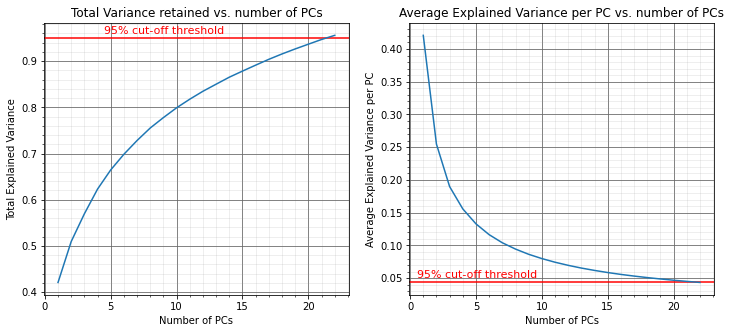

In [107]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(4.5, 0.96, '95% cut-off threshold', color = 'red', fontsize=11)
plt.title('Total Variance retained vs. number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Total Explained Variance')
plt.plot(range(1,23), variance1)


plt.subplot(1, 2, 2)
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.axhline(y=.9559/22, color='r', linestyle='-')
plt.text(.5, 0.051, '95% cut-off threshold', color = 'red', fontsize=11)
plt.title('Average Explained Variance per PC vs. number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Average Explained Variance per PC')
plt.plot(range(1,23), variance2)

To this end, the two above graphs:

- the cumulative sum of data variance (eigenvalues) for different numbers of principal components (eigenvectors),
- the average (per PC) cumulative sum of data variance of the above eigenvalues against the number of PCs (dividing each sum of eigenvalues by the number of corresponding PCs (eigenvectors) before plotting it against the PCs' number) 

provide a good indication of when we hit the point of diminishing returns (i.e., little variance is gained by retaining additional eigenvalues), and that is around the number 5 of PCs.

After all, given the size of our data set, we are able to calculate (always with a 5-fold cross-validation) the accuracy of the SVM classifier for the four different kernel functions for all different numbers of principal components.

In [111]:
svm_rbf = svm.SVC(kernel='rbf', random_state=0, gamma='auto')
accuracies_svm_rbf =  []
svm_linear = svm.SVC(kernel='linear', random_state=0, gamma='auto')
accuracies_svm_linear = []
svm_poly = svm.SVC(kernel='poly', random_state=0, gamma='auto')
accuracies_svm_poly = []
svm_sigmoid = svm.SVC(kernel='sigmoid', random_state=0, gamma='auto')
accuracies_svm_sigmoid = []

for i in range(1,23):
    pcs = PCA(n_components=i).fit_transform(X)
    accuracies_svm_rbf.append(cross_val_score(svm_rbf, pcs, y, cv=5,scoring='accuracy').mean())
    accuracies_svm_linear.append(cross_val_score(svm_linear, pcs, y, cv=5, scoring='accuracy').mean())
    accuracies_svm_poly.append(cross_val_score(svm_poly, pcs, y, cv=5, scoring='accuracy').mean())
    accuracies_svm_sigmoid.append(cross_val_score(svm_sigmoid, pcs, y, cv=5, scoring='accuracy').mean())

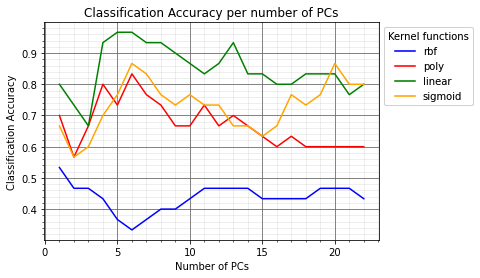

In [110]:
line1, = plt.plot(range(1,23), accuracies_svm_rbf, label="rbf", color='blue')
line2, = plt.plot(range(1,23), accuracies_svm_poly, label="poly", color='red')
line3, = plt.plot(range(1,23), accuracies_svm_linear, label="linear", color='green')
line4, = plt.plot(range(1,23), accuracies_svm_sigmoid, label="sigmoid", color='orange')
# Create a legend for the first line.
first_legend = plt.legend(bbox_to_anchor=(1, 1), title="Kernel functions")
# Add the legend manually to the current Axes.
ax = plt.gca().add_artist(first_legend)
# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Classification Accuracy per number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Classification Accuracy')
plt.show()

From the above, it follows that the most satisfactory in our case kernel function is the linear while the worst is the radial basis. It is also confirmed that indeed for the efficient in our case kernel functions (linear, sigmoid, polynomial) the peak of the accuracy performance of the SVM classifier is taking place around 5 or 6 principal components. Also of interest is the generally declining course of classification accuracy after these first 6 principal components, despite the fluctuations, which is probably due to overfitting because of the inclusion of noise information (phenomenon from which we try to escape with PCA approach).

# Conclusions

Trying to sum up our conclusions, we would say that between a simple 1-nn classifier (either with the large data or after a decomposition that will maintain only the principal components that correpsond to 95% of the data variance) is inferior in terms of classification accuracy to a Support Vector Machine classification — at least to a SVM with linear or a sigmoid kernel function. We can also note that the accuracy score of SVM with these two kernel functions is not affected by the dimensions reduction after the PCA decomposition with 95% of variance retained. Even more, the accuracy score with the three most favourable kernel functions (linear, sigmoid, polynomial) is even better if we choose even fewer PCs, in other words, if we rely on even less image data variance/information (but now decorrelated data). More precisely, even with 64% of variance retained, with a peak at 67% and 70%  (respectively 4, 5 and 6 PCs), the classification accuracy of the SVM classifiers is significantly better and from that point on continuously decreasing (despite the turbulence) going towards 95% (22 PCs), the percentage we initially chose to use. It is therefore normal to end up with a combination of SVM algorithm, linear kernel function and 5 or 6 Principal Components decompostion for the optimisation of our image data 3-class classification model.